In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load the Dataset
credit_card_data = pd.read_csv("drive/MyDrive/Projects/Credit Card/creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Information about the dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Check for the missing values in each columns
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# The distribution of Fradulent and Legit Transactions
credit_card_data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Here, the data is highly baised with mode Legit transactions.

In this case, we have two labesl,
1. `0` represets the Legit Transaction
2. `1` represents the Fraudulent Transaction

In [11]:
# Sepereating the data analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


In [13]:
# Statistical Measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# COmpare the values for both the transactions
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Under-Sampling

Bulid the sample dataset containing similiar distribution of Legit and Fraudulent Transactions

The No.of Fradualent Transactions are: 492

So, we need no.of the Legit Transactions to be 492

In [16]:
legit_sample = legit.sample(n=492)

In [19]:
# Conacatenate the two dataframes
new_df = pd.concat([legit_sample, fraud], axis=0)

In [21]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
196092,131356.0,-1.737076,-2.593585,-0.255225,-2.343987,0.832136,-2.332851,-0.260175,-0.337634,-1.789044,...,0.045780,1.237680,1.792469,0.004227,-0.377575,-0.140018,0.624648,0.101111,15.00,0
211944,138639.0,-1.303359,-0.491704,1.427831,-0.341948,0.918552,5.489721,-2.115146,2.101113,-0.087185,...,-0.202152,0.109355,-0.260193,0.698132,0.538468,-0.131425,0.356962,0.036488,30.00,0
255497,157255.0,1.989014,-0.643864,-1.952575,-1.436633,-0.171119,-1.538847,0.372275,-0.340535,1.404897,...,0.077886,0.341687,-0.016348,0.051337,0.271517,-0.151702,-0.057197,-0.076457,56.06,0
245944,152973.0,0.157581,0.250385,1.346882,-0.026305,0.050254,0.427339,0.100260,0.068694,0.504599,...,0.264794,1.065789,-0.153672,0.788223,-0.399160,-0.168506,-0.033535,-0.153454,13.53,0
50103,44348.0,-0.356236,1.088176,1.181898,-0.133526,0.256354,-0.468200,0.608542,0.088194,-0.649931,...,-0.233321,-0.627183,-0.072905,-0.044656,-0.143651,0.074407,0.242738,0.084874,1.98,0


In [24]:
new_df.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [25]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94353.821138,-0.041061,0.026307,-0.072402,-0.079209,0.068078,0.126877,0.037543,-0.044860,-0.040669,...,-0.009274,0.003555,0.033745,0.000122,-0.019412,0.026738,-0.003764,-0.019380,-0.004671,98.384756
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Now split the data into Features and Targets

In [26]:
X = new_df.drop("Class", axis=1)
y = new_df["Class"]

In [27]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
196092,131356.0,-1.737076,-2.593585,-0.255225,-2.343987,0.832136,-2.332851,-0.260175,-0.337634,-1.789044,...,-0.715353,0.045780,1.237680,1.792469,0.004227,-0.377575,-0.140018,0.624648,0.101111,15.00
211944,138639.0,-1.303359,-0.491704,1.427831,-0.341948,0.918552,5.489721,-2.115146,2.101113,-0.087185,...,-0.134368,-0.202152,0.109355,-0.260193,0.698132,0.538468,-0.131425,0.356962,0.036488,30.00
255497,157255.0,1.989014,-0.643864,-1.952575,-1.436633,-0.171119,-1.538847,0.372275,-0.340535,1.404897,...,-0.205083,0.077886,0.341687,-0.016348,0.051337,0.271517,-0.151702,-0.057197,-0.076457,56.06
245944,152973.0,0.157581,0.250385,1.346882,-0.026305,0.050254,0.427339,0.100260,0.068694,0.504599,...,0.086449,0.264794,1.065789,-0.153672,0.788223,-0.399160,-0.168506,-0.033535,-0.153454,13.53
50103,44348.0,-0.356236,1.088176,1.181898,-0.133526,0.256354,-0.468200,0.608542,0.088194,-0.649931,...,0.139289,-0.233321,-0.627183,-0.072905,-0.044656,-0.143651,0.074407,0.242738,0.084874,1.98


In [28]:
y.head()

196092    0
211944    0
255497    0
245944    0
50103     0
Name: Class, dtype: int64

Now Split the data into `Train` and `Test` datasets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
print(X_train.shape, X_test.shape)

(787, 30) (197, 30)


In [32]:
print(y_train.shape, y_test.shape)

(787,) (197,)


# Modelling

## 1. Logistic Regression Model

In [34]:
log_model = LogisticRegression()

In [35]:
# train the model with the train data
log_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
log_model.score(X_test, y_test)

0.9390862944162437

# Model Evaluation

## Accuracy Score

In [48]:
from sklearn.metrics import accuracy_score

train_preds = log_model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print(f"The accuracy Score on Train data is: {train_acc*100:.2f}%")

The accuracy Score on Train data is: 90.98%


In [47]:
# Accuracy score on Test data
test_preds = log_model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"The Accuracy Score on the Test data is: {test_acc*100:.2f}%")

The Accuracy Score on the Test data is: 93.91%
The Accuracy Score on the Test data is: 93.91%


## Confusion Matrx

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(test_preds, y_test)
conf_matrix

array([[94,  7],
       [ 5, 91]])

<Axes: >

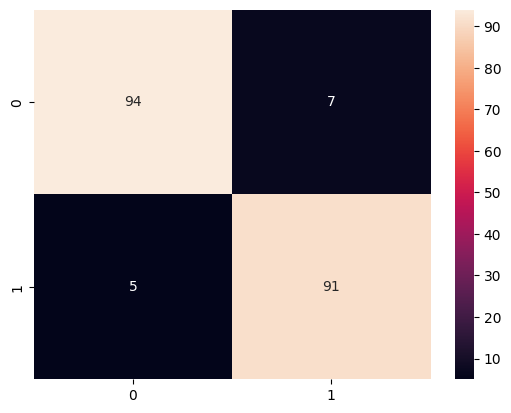

In [51]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [53]:
class_report = classification_report(test_preds, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       101
           1       0.93      0.95      0.94        96

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

